# Normal Distribution - Continuous Random Variable.



## 1. Install all required libraries

- <b>pip install numpy</b> - <span style="color:red">High performing calculating library</span>
- <b>pip install pandas</b> - <span style="color:red"><i>Data table manipulation library</i></span>
- <b>pip install matplotlib</b> - <span style="color:red"><i>Data visualization library</i></span>
- <b>pip install scipy</b> - <span style="color:red"><i>Statistics library</i></span>
- <b>pip install statistics</b> - <span style="color:red"><i>Statistics library</i></span>
- <b>pip install seaborn</b> - <span style="color:red"><i>Data visualization library</i></span>

## 2. Import the installed library

In [4]:
import numpy as np # Import 'numpy' library and call it as 'np'.
import pandas as pd
import matplotlib as map
import matplotlib.pyplot as plt
import scipy as sc
import statistics as stat
from scipy.stats import binom # from stats module in scipy library already imported, import binom function.
import seaborn as sns

## 3. Calculating Probability in Normal Distribution

### (1) Creating normal distribution

To draw a chart of normal idstribution, we need the following information:

<ol> 
<li>Mean: m</li>
<li>Standard deviation: sd</li>
<li>Number of samples: n</li>
</ol>

Then, here is our CASE STUDY scenario.

<blockquote><b>CASE STUDY.</b>
<span style="font-size:16px">Greer is a manufacuturing company producing flight engines. Greer will guarantee that its engines will provide a certain amount of lifetime flight hours subject to the airline purchasing a preventive-maintenance service plan that is also provided by Greer.

With proper maintenance service, their engine’s lifetime flight hours achieved is normally distributed, mean=36500, and SD=5000.</span></blockquote>

In [5]:
# Create data: Assuming randomly selected and normaly distributed
m=36500 # mean
sd=5000 # standard deviation
n=1000000 # number of samples (I set it just arbitrarly.

# numpy's "random" module has "normal" function to create 
# normal random distribution given input of m, sd, and n.
value = np.random.normal(loc=m,scale=sd,size=n)
print(value)

# INTERSTING FACT: Whenever you execute the np.random.normal function,
# you will find that your output value is different. That is because 
# it is purely 'random' creation. Also, that is, we can create almost 
# infinite number of different normal distribution sharing same m, sd, and n.


[29923.82236866 40910.85127748 36520.47945845 ... 37307.18056737
 46446.46407479 33074.30252218]


/Users/bgong/Documents/PyProjects/BA_normdist/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bgong/Documents/PyProjects/BA_normdist/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


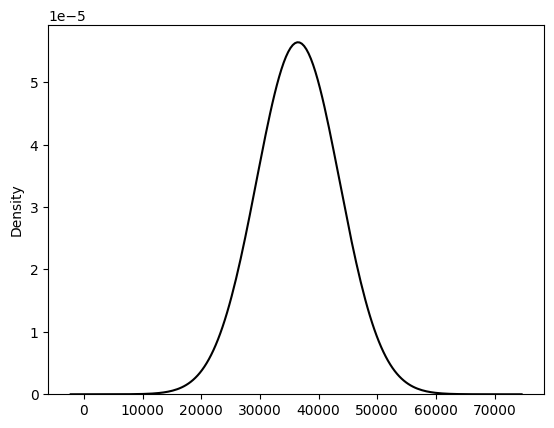

In [6]:
# Creating normal distribution using Seaborn library's kdeplot function.
# By adding 'get_lines()' and 'get_data()' function, you can extract x and y axis value used to
# create the chart.
points = sns.kdeplot(value, fill=False, bw_method=1.0, color='black').get_lines()[0].get_data()

### (2) Calculating Probability(y) given Value of Interest(k)

Then, here is our QUESTION to answer given the CASE STUDY scenario.

<blockquote><b>QUESTION.</b>
<span style="font-size:16px">Greer would like to know what percentage of its aircraft engines will be expected to last more than 40,000hrs once they receive proper maintenance and service pack. That is, what is the probability that the aircraft lifetime flight hours will exceed 40,000.</span></blockquote>

First thing to do is identifying three variables:

- m=36500
- sd=5000
- k=40000

In [44]:
# Calculating the probability y given k(=value of interest)
# Our value of interest now in this question is k=40,000
m=36500
sd=5000
k=40000
# stat library has NormalDist function to calculate 
nmdist=stat.NormalDist(mu=m, sigma=sd)
# cdf function represents "cumulative distribution function"
# calculating the size of area under the curve given range of 0-k value.
prob_k=nmdist.cdf(k) # Using nmdist object created above calculate the cdf given k.
prob_k


0.758036347776927

<span style="font-size:16px"> But, this value indicates the probability of k < 40,000 not k >= 40,000.
To visualize the size of the area, please look at the code and return output below:</span>


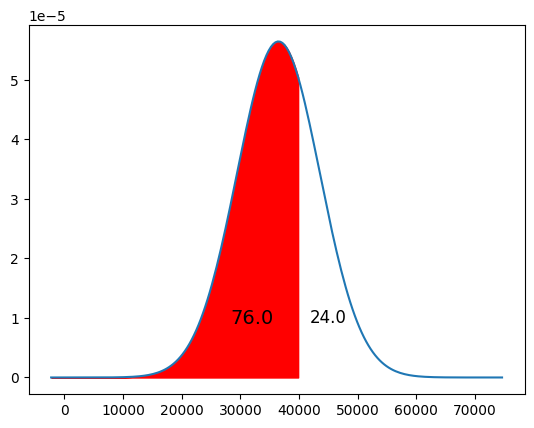

In [30]:
x=points[0] # We created the 'points' object above, and its first element include x axis value.
y=points[1] # We created the 'points' object above, and its second element include y axis value.
fig, ax = plt.subplots()
ax.plot(x,y)

ax.fill_between(x, y, color='white',alpha=0.2) # Color in yellow all area under the curve.
ax.fill_between(x, y, where = (x<k), color='r') # Color in red area under the curve given range of 0-40000.

ax.text(k-8000, 0.00001, round(prob_k*100,0), ha='center', va='center', fontsize=14, color='black')
ax.text(k+5000, 0.00001, round((1-prob_k)*100,0), ha='center', va='center', fontsize=12, color='black')
plt.show()

<span style="font-size:16px">So, the value created out of .cdf(k) function should be subtracted from 1.</span>

In [85]:
print("A probability that the aircraft lifetime flight hours will exceed 40,000 is", round(1-prob_k,4)*100,"%")

A probability that the aircraft lifetime flight hours will exceed 40,000 is 24.2 %


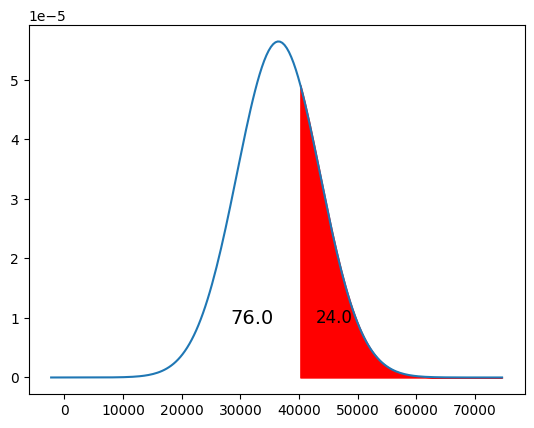

In [52]:
fig, ax = plt.subplots()
ax.plot(x,y)

ax.fill_between(x, y, color='white',alpha=0.2) # Color in yellow all area under the curve.
ax.fill_between(x, y, where = (x>=k), color='r') # Color in red area under the curve given range of 0-40000.
ax.text(k*0.8, 0.00001, round(prob_k*100,0), ha='center', va='center', fontsize=14, color='black')
ax.text(k*1.15, 0.00001, round((1-prob_k)*100,0), ha='center', va='center', fontsize=12, color='black')
plt.show()

### (3) Calculating Value of Interest Given Probability(y)

<span style="font-size:16px">Reversely, we can calculate the value of interest, x axis value that matches with certain probability in the normal probability distribution chart.</span>

<span style="font-size:16px">The information you should have to calculate it is:</span>

<ol> 
<li>Mean: m</li>
<li>Standard deviation: sd</li>
<li>Probability of your interest: p</li>
</ol>

<blockquote><b>QUESTION.</b><span style="font-size:16px"> Now Greer is considering to provide a discount on a replacement of aircraft engine if the original engine does not meet the lifetime-flight-hour guarantee.

How many lifetime flight hours should Greer guarantee if Greer wants no more than 10% of aircraft engines to be eligible for the discount guarantee?</span></blockquote>

<span style="font-size:16px">First thing to do is identifying three variables:</span>

- m=36500
- sd=5000
- p=0.1(10%)

In [33]:
# Calculating k(=value of interest) given the probability y
# Our prob. of interest now in this question is p=0.1
m=36500
sd=5000
p=0.1
# stat library has NormalDist function to calculate 
nmdist=stat.NormalDist(mu=m, sigma=sd)
# inv_cdf function represents "inverse cumulative distribution function"
# calculating range of value that matches with the size of area(=probability).
k_inv=nmdist.inv_cdf(p) # Using nmdist object created above calculate the inv_cdf given p.
k_inv

30092.242172276994

In [34]:
print("The aircraft lifetime flight hours no more than 10% of its produced engines exceed is", round(k_inv),"hrs")

The aircraft lifetime flight hours no more than 10% of its produced engines exceed is 30092 hrs


<span style="font-size:16px">Then, again, we can visualize our normal distribution chart with the identified value of interest given the probability of interest. So, once the Greer company set about 30,000 hrs as the guaranteed lifetime of its engine, then Greer only needs to provide discount for less than 10% of its engines produced.</span>

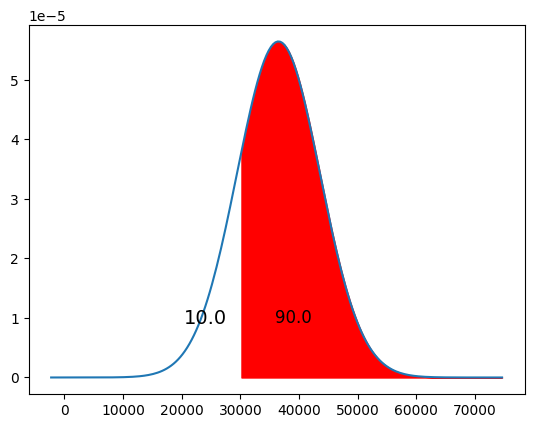

In [42]:
fig, ax = plt.subplots()
ax.plot(x,y)

ax.fill_between(x, y, color='white',alpha=0.2) # Color in yellow all area under the curve.
ax.fill_between(x, y, where = (x>=k_inv), color='r') # Color in red area under the curve given range of 0-40000.
ax.text(k_inv*0.8, 0.00001, round(p*100,0), ha='center', va='center', fontsize=14, color='black')
ax.text(k_inv*1.3, 0.00001, round((1-p)*100,0), ha='center', va='center', fontsize=12, color='black')
plt.show()